In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import cxroots

In [2]:
%matplotlib inline

In [3]:
import xwglib as tmm

In [4]:
energy = 14.41

materials = {
    'Pt' : tmm.XRLMaterial(formula='Pt', color='grey', density=21.45),
    'Ta' : tmm.XRLMaterial(formula='Ta', color='green', density=16.6),
    'B4C' : tmm.XRLMaterial(formula='B4C',color='yellow', density=2.52),
    'C' : tmm.XRLMaterial(formula='C', color='black', density=3.52),
    'Fe' : tmm.XRLMaterial(formula='Fe', color='red', density=7.87),
    'Air' : tmm.ConstMaterial(name='Air', color='white', index=1.0),
}

In [5]:
inner_layers = (
    tmm.Layer(materials['Pt'], 1.5),
    tmm.Layer(materials['B4C'], 20),
    tmm.Layer(materials['Fe'], 1.5),
    tmm.Layer(materials['B4C'], 20),
)

layerstack = tmm.LayerStack(materials['Air'], 
                        inner_layers, 
                        materials['Pt'] )

In [6]:
m = tmm.Model(*layerstack.get_parameters(energy=energy), method='fourier', branch=tmm.BranchCut.outgoing)

In [7]:
xmin = 1 - 5e-5
xmax = 1

In [8]:
th = np.linspace(1e-7, 10e-3, 1000)
z0 = 22
q = np.cos(th)

gf = m.greens_function_te(z0, z0, q)

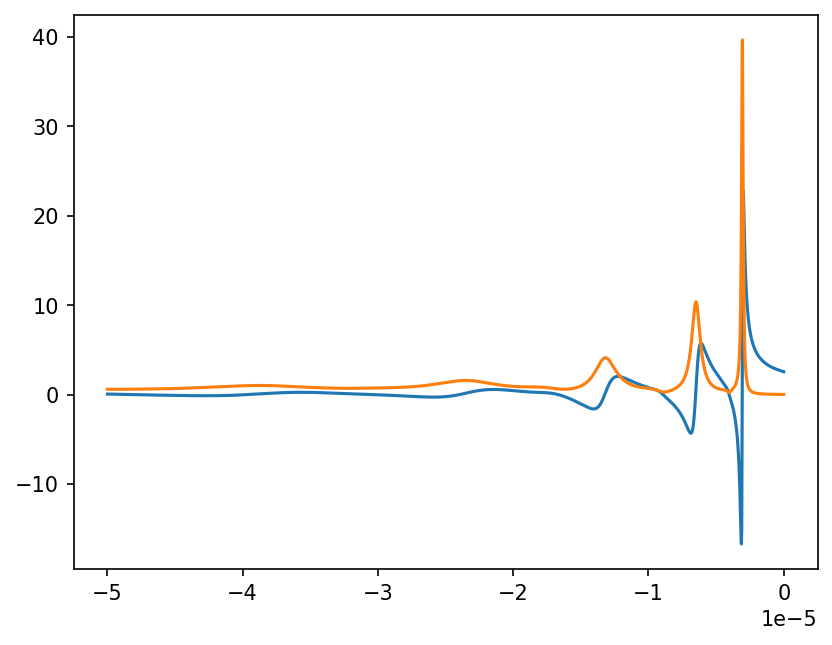

In [9]:
fig, ax = plt.subplots(dpi= 150)
ax.plot(q- 1, gf.real)
ax.plot(q- 1, gf.imag)


In [10]:
m3 = tmm.Model(*layerstack.get_parameters(energy=energy), method='fourier', branch=tmm.BranchCut.vertical)
s3 = tmm.Modefinder(m3)

branchpoints = (m3.n_neg, m3.n_pos)

x_range = (1-5e-5,1)
y_range=(-1e-5, 1e-5)
contours = tmm.get_contours(branchpoints, x_range=x_range, y_range=y_range)

In [11]:


results, rootresults = zip(*[s3.find_modes(c, polarization='TE') for c in contours])
result = results[0] + results[1]

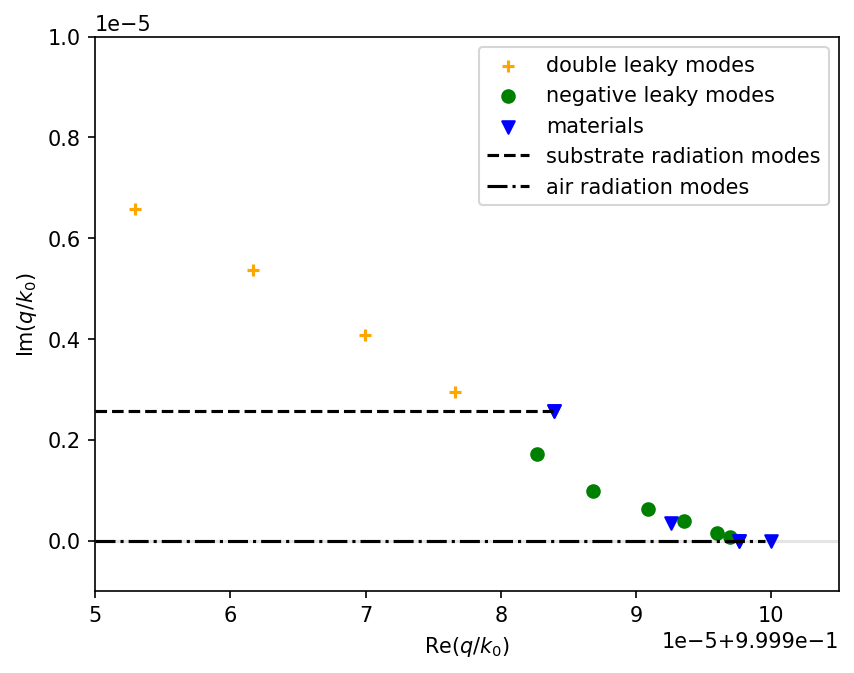

In [12]:
rad_neg, rad_pos = s3.radiation_modes(np.linspace(xmin, xmax, 100))
fig, ax = plt.subplots(dpi=150)
#ax.scatter(result.indices.real, result.indices.imag, color='green', label='modes')
ax.scatter(result.indices_leaky_double.real, result.indices_leaky_double.imag, marker='+', color='orange', label='double leaky modes')
ax.scatter(result.indices_leaky_neg.real, result.indices_leaky_neg.imag, marker='o', color='green', label='negative leaky modes')

ax.scatter(m3.n.real, m3.n.imag, marker='v', color='blue', label='materials')
#ax.scatter(n_clad.real, n_clad.imag)
ax.plot(rad_pos.real, rad_pos.imag, ls='--', color='black', label='substrate radiation modes')
ax.plot(rad_neg.real, rad_neg.imag, ls='-.', color='black', label='air radiation modes')

ax.axhline(0, color='black', alpha=0.1)

ax.set_xlim(xmin, xmax+0.5e-5)
ax.set_ylim(-0.1e-5, 1e-5)

#ax.grid()
ax.set_xlabel(r'$\mathrm{Re}(q/k_0)$')
ax.set_ylabel(r'$\mathrm{Im}(q/k_0)$')
ax.legend()
#fig.savefig('modes.png')

(-1.0, 1.0)

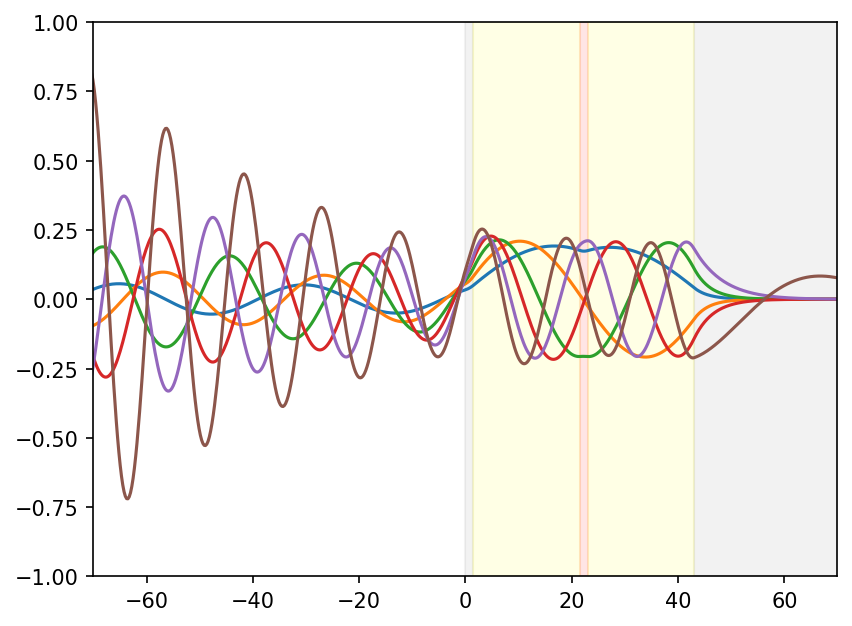

In [13]:
margin = 100

xxx = np.linspace(0-margin, layerstack.get_thickness()+margin, 1000)

fig, ax = plt.subplots(dpi=150)
layerstack.plot_layers(ax, infinity=margin)

for u in np.flip(np.sort(result.indices_leaky_neg.compressed())):

    profile0 = s3.solution_neg_te(u, normalized=True, force_resonant=True)
    ax.plot(xxx, np.real(profile0(xxx)))

ax.set_xlim(-70,70)
ax.set_ylim(-1,1)


(-70.0, 70.0)

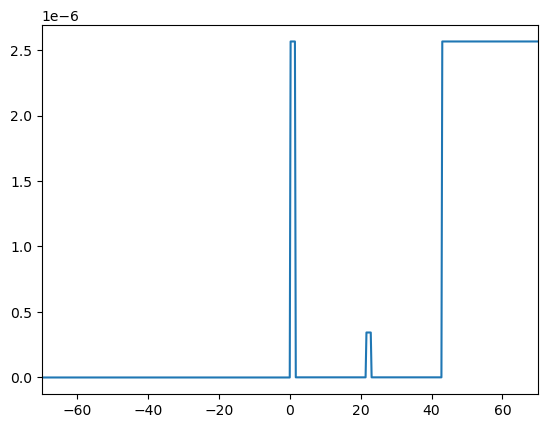

In [15]:
fig, ax = plt.subplots()
ax.plot(xxx, np.imag(m.index_profile(xxx)))
ax.set_xlim(-70,70)